# Bankruptcy in the Netherlands

## Course: Programming with data (INFOB2PWD)

### Students: Annette Holst, Georg Vasiliv, Robin Papenhuijzen and Rina van Woerden

This data set contains information on the number of bankruptcy orders issued by Dutch Courts. The data is categorized based on the type of bankruptcy. It can be natural persons with or without sole proprietorship, enterprises, institutions and geographical regions.
The time span of this dataset is from January 2009 till February 2025. The latest figures are subject to revision and the last two months are provisional.

The time span of this dataset is from January 2009 till February 2025. The latest figures are subject to revision and the last two months are provisional. The significance level is  $a=0.05$. 

First, an overview of the data set will be given and the data set will be prepared for the analysis. Then the following research' questions will be explored:
* How have bankruptcy rates changed over time?
* How do bankruptcy trends differ across different geographical regions?
* How do bankruptcy trends differ between the Randstad and the suburbs?
* How did bankruptcy trends differ for businesses with and without sole proprietorships before and after COVID-19?


### NOG DOEN !!! : Longer pieces of code, especially when not directly meaningful for the narrative (for example details of the data pre-processing when loading the data from the CSV files), are stored in separate .py modules and imported to the notebook

In [20]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import requests
import matplotlib.image as mpimg
from plotnine import *
from statsmodels.formula.api import ols 
import statsmodels.api as sm

In [21]:
# Transforming the csv-file to a data frame
df = pd.read_csv("82522ENG_UntypedDataSet_20032025_155613.csv", sep = ";")
# Overview of the data set
df.head()

,ID,TypeOfBankruptcy,Regions,Periods,PronouncedBankruptcies_1
0,0,A047596,NL00,2009MM01,563
1,1,A047596,NL00,2009MM02,601
2,2,A047596,NL00,2009MM03,768
3,3,A047596,NL00,2009KW01,1932
4,4,A047596,NL00,2009MM04,717


In [22]:
# Shows the size of the data set and the data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49320 entries, 0 to 49319
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        49320 non-null  int64 
 1   TypeOfBankruptcy          49320 non-null  object
 2   Regions                   49320 non-null  object
 3   Periods                   49320 non-null  object
 4   PronouncedBankruptcies_1  49320 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.9+ MB
None


In [23]:
# Statistics of the data set
print(df.describe())

                 ID  PronouncedBankruptcies_1
count  49320.000000              49320.000000
mean   24659.500000                 51.365977
std    14237.601975                246.609041
min        0.000000                  0.000000
25%    12329.750000                  2.000000
50%    24659.500000                  8.000000
75%    36989.250000                 27.000000
max    49319.000000               9431.000000


In [24]:
# Count unique values of tye of bankruptcy
type_bankruptcy = df.value_counts('TypeOfBankruptcy')
print(type_bankruptcy)

# Count unique values of regions (output not shown here, because there are many reasons)
# regions = df.value_counts('Regions')
# print(regions)

TypeOfBankruptcy
A028820    16440
A047596    16440
A047597    16440
Name: count, dtype: int64


As shown, there are three types of bankruptcies: A028820, A047596 and A047597    
Each type of bankruptcy has 16.440 rows.

As deriven from the meta-data, the codes mean the following:
* *A028820*: Nat. person with sole proprietorship
    * A legal form without legal personality, where one natural person owns the business. The owner is entirely liable for all business and capital matters. There is no distinction between business assets and personal assets.
* *A047596* stands for Total entities with/without legal pers.
    * Total entities with and without legal personality and sole proprietors
* *A047597* stands for Companies and institutions
    * Partnerships without legal personality and legal entities
 
To make the data set more clear, we will rename these codes to:
* A028820: only_sole_prop
* A047596: total
* A047597: without_sole_prop

In [25]:
# Renaming types of bankruptcies
df = df.replace('A028820','only_sole_prop')
df = df.replace('A047596','total')
df = df.replace('A047597','without_sole_prop') 

# Check if succeeded
type_bankruptcy = df.value_counts('TypeOfBankruptcy')
print(type_bankruptcy)

TypeOfBankruptcy
only_sole_prop       16440
total                16440
without_sole_prop    16440
Name: count, dtype: int64


In [26]:
i = 20
t = 0
# List of provinces
list = ['Groningen', 'Fryslan', 'Drenthe', 'Overijssel', 'Flevoland', 'Gelderland', 'Utrecht', 'Noord-Holland', 'Zuid-Holland', 'Zeeland', 'Noord-Brabant', 'Limburg']
# For-loop to replace provinces indexes with names
for i in range(20,32):
    df = df.replace(f'PV{i}  ',f'{list[t]}')
    t = t + 1

# Check if it worked
# regions = df.value_counts('Regions')
# print(regions)

In [27]:
# Missing values => meta-data?

Research 1:

Research 2:

Research 3:

## Bankruptcy trends before and after COVID-19: sole proprietorships vs. other businesses

Last week a news article was published about the economical impact of COVID-19 on the Netherlands (Schallenberg, 2025). The expectation at the beginning of COVID-19 was that businesses with little to no revenue would go bankrupt, but in reality fewer and fewer businesses went bankrupt. According to the article it was only since 2024 that bankruptcies exceeded pre-COVID levels (see the picture below). The first (registered) case of COVID-19 in the Netherlands was in the beginning in 2020. 

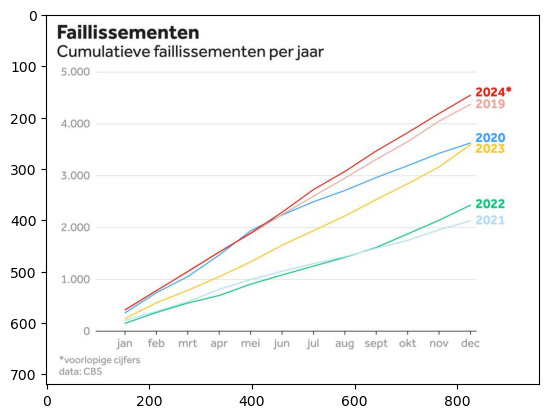

In [28]:
# Retrieve image from NOS-article
image = requests.get('https://cdn.nos.nl/image/2025/03/16/1203490/960x720a.jpg')

# Download and save the image in the␣ same location as the .ipynb file
with open('nos.jpg', 'wb') as image_file: 
    image_file.write(image.content)

# Print the image as a plot
image = mpimg.imread('nos.jpg')
plt.imshow(image)
plt.show()


It would be interesting to see if this same bankruptcy trend differs accros different types of proprietorship: companies only with and without sole proprietorship. This leads to the following research' question: How did bankruptcy trends differ for businesses with and without sole proprietorships before and after COVID-19?

First, an overview of annual bankruptcy trends will be analyzed, focusing on the same period Schallenberg (2025) used for her conclusions. However, since COVID-19 emerged in 2019, we will also include data from 2018, so the trends before COVID-19 had an impact will be studied. After establishing this general overview, we will conduct a more statistical approach of bankruptcy trends, comparing the periods before and after the pandemic.

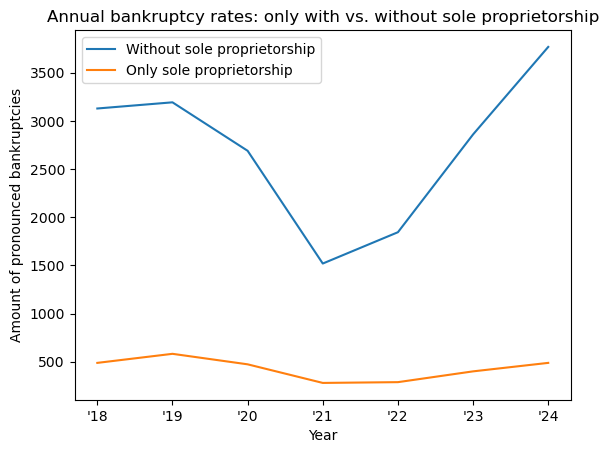

In [29]:
# List of years within studied timeframe
researched_period = ["2018JJ00", "2019JJ00", "2020JJ00", "2021JJ00", "2022JJ00", "2023JJ00", "2024JJ00"]

# Create a subset of the data without sole prorietory every year in the Netherlands
df_without_sol = df[df["Periods"].isin(researched_period) & df["Regions"].astype(str).str.contains("NL01", na=False) & df["TypeOfBankruptcy"].astype(str).str.contains("without_sole_prop", na=False)]

# Create a subset of the data with only sole prorietory every year in the Netherlands
df_only_sol = df[df["Periods"].isin(researched_period) & df["Regions"].astype(str).str.contains("NL01", na=False) & df["TypeOfBankruptcy"].astype(str).str.contains("only_sole_prop", na=False)]

# Function to replace period names with shortened names with a more readable format
def dataframe(z):
    i = 0 
    year = 2018
    count = 18
    for i in range(0,7):
            z = z.replace(f"{year}JJ00" ,f"'{count}")
            year = year + 1
            count = count + 1
    return z

# Applying the functions on the subsets
df_without_sol = dataframe(df_without_sol)
df_only_sol = dataframe(df_only_sol)

# Combining the dataframes into one plot
x = df_only_sol["Periods"]
y1 = df_without_sol["PronouncedBankruptcies_1"]
y2 = df_only_sol["PronouncedBankruptcies_1"]
plt.plot(x, y1, label='Without sole proprietorship')
plt.plot(x, y2, label='Only sole proprietorship')
plt.legend()
plt.title('Annual bankruptcy rates: only with vs. without sole proprietorship')
plt.xlabel('Year')
plt.ylabel('Amount of pronounced bankruptcies')
plt.show()


As shown in the graph above, from 2018 till 2019 there seems to be an increasing trend in the amount of pronounced bankruptcies for both businesses with and without sole proprietorships. However, there is a clear difference in the number of pronounced bankruptcies between the two groups. Businesses without sole proprietorships experience fluctuations between 1.500 and 3.500 bankruptcies per year during this period, whereas sole proprietorships consistently remain around 500 bankruptcies annually. The trend of declining business bankruptcies during COVID-19, as noted by Schallenberg (2025), appears to be accurate. However, this downward trend had already begun in 2019, even before the first COVID-19 case was diagnosed in the Netherlands. Starting in 2021, the number of pronounced bankruptcies began to rise. From 2022 onward, there was a notable surge in bankruptcies among businesses without sole proprietorships. For sole proprietorships there seems to be a relative steeper increase in bankruptcies from 2022 onward. 

To determine whether the difference between sole proprietorships and businesses without sole proprietorships before and after COVID-19 is significant, we will conduct a two-way ANOVA (Variance analysis). The pre-COVID-19 period will be defined as 2018 through 2019, while the post-COVID-19 period will begin in 2023.

In [30]:
# List of before and after Covid-years
years = ["2018", "2019", "2023", "2024"]

# Create a subset of the data with and without sole prorietory of every month of every year in this timeframe Netherlands
df_covid = df[df["Periods"].astype(str).str.contains("MM", na=False) & df["Periods"].astype(str).str.contains('|'.join(years), na=False) & df["Regions"].astype(str).str.contains("NL01", na=False) & (df["TypeOfBankruptcy"].astype(str).str.contains("without_sole_prop", na=False) | df["TypeOfBankruptcy"].astype(str).str.contains("only_sole_prop", na=False))]


In [41]:
# List of years before and after Covid
precovid_years = ["2018", "2019"]
aftercovid_years = ["2023", "2024"]

# Creating new columns that contain either the before or after Covid years and replace them with true (pre-covid) and false (after-covid) values
df_covid["Covid"] = df_covid["Periods"].astype(str).str.contains('|'.join(precovid_years))
df_covid["Covid"] = df_covid["Periods"].astype(str).str.contains('|'.join(aftercovid_years), regex='True')

# Replacing 'True' and 'False' with actual meanings
df_covid = df_covid.replace(False, 'precovid')
df_covid = df_covid.replace(True, 'aftercovid')

# Replacing variables' name for better understanding
df_covid["TypeOfBankruptcy"] = df_covid["TypeOfBankruptcy"].replace("only_sole_prop", "sole_prop")
df_covid["TypeOfBankruptcy"] = df_covid["TypeOfBankruptcy"].replace("without_sole_prop", "without_sole_prop")

# Converting the independent variables we want to analyse into factors 
df_covid["Covid"] = df_covid["Covid"].astype(object)
df_covid["TypeOfBankruptcy"] = df_covid["TypeOfBankruptcy"].astype(object)

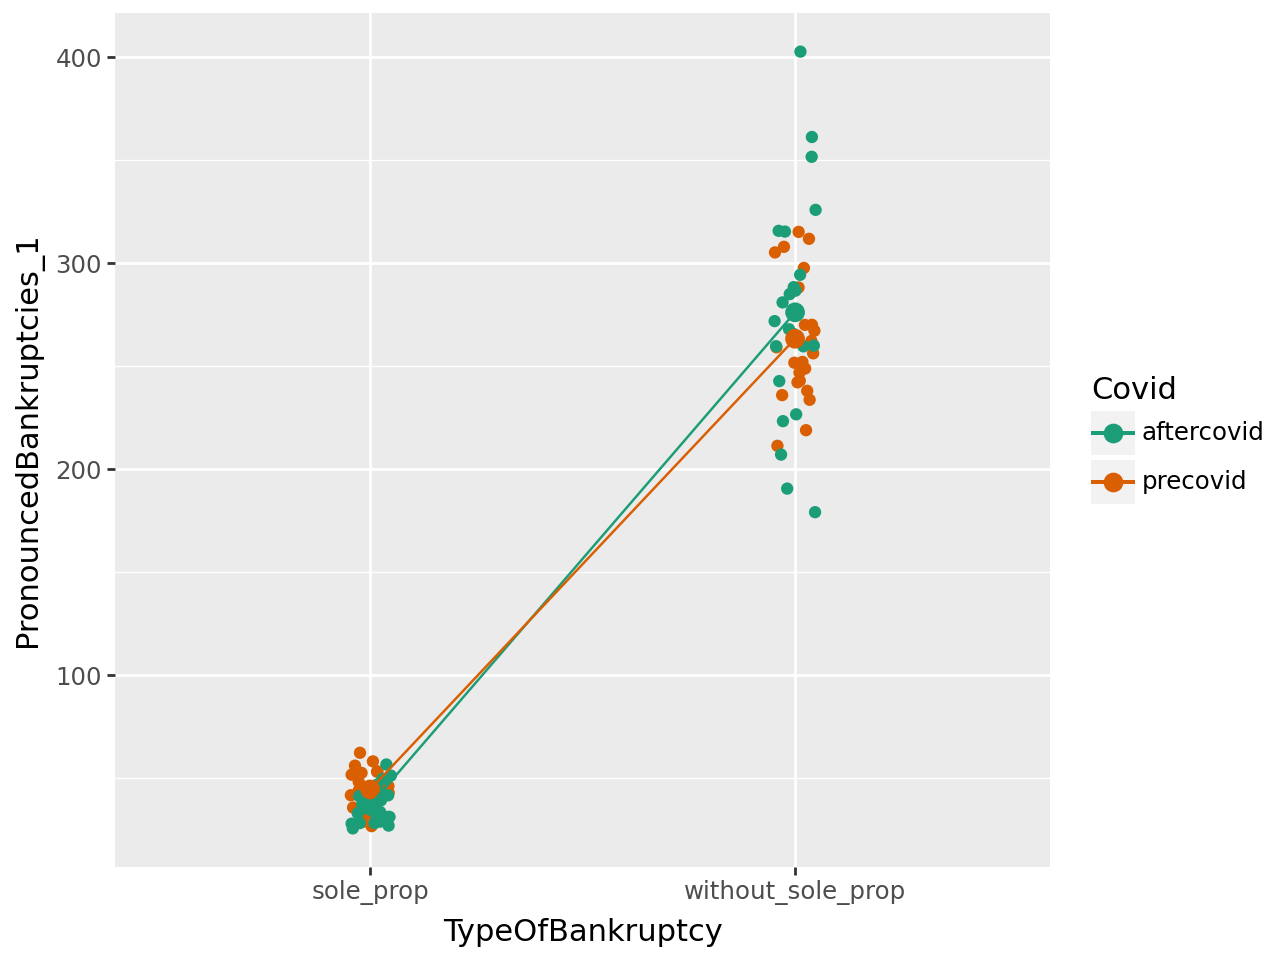

In [45]:
# Visualise the data, timeperiod and type of business vs pronounced bankruptcies via an interaction plot
(ggplot(df_covid,
        aes(x = "TypeOfBankruptcy", y = "PronouncedBankruptcies_1",
            colour = "Covid", group = "Covid")) +
     geom_jitter(width = 0.05) + #  displays the data, with a tiny bit of random noise, to separate the data points a bit for visualisation
     stat_summary(fun_data = "mean_cl_boot",
                  geom = "point", size = 3) +
     stat_summary(fun_data = "mean_cl_boot", # calculates the mean for each group
                  geom = "line") +
     scale_colour_brewer(type = "qual", palette = "Dark2")) # colour palette 

As we can derive from the interaction plot, the two lines intersect slightly, which means that there appears to be an interaction between type of bankruptcy and the time period (before or after COVID-19). We'll test with a two-way ANOVA if this interaction is significant or these two variables individually significantly impact the type of business.

In [43]:
# Create a linear model
model = ols(formula = "PronouncedBankruptcies_1 ~ TypeOfBankruptcy * Covid", data = df_covid)

# and get the fitted parameters of the model
lm_anova = model.fit()

sm.stats.anova_lm(lm_anova, typ = 2)

,sum_sq,df,F,PR(>F)
TypeOfBankruptcy,1.258355e+06,1.0,1317.147637,2.602832e-56
Covid,1.627604e+02,1.0,0.170365,6.807481e-01
TypeOfBankruptcy:Covid,2.511260e+03,1.0,2.628591,1.083773e-01
Residual,8.789346e+04,92.0,NaN,NaN


The results of the two-way ANOVA indicate that there is no significant interaction between the type of bankruptcy and the timeframe (before or after COVID-19) on the number of declared bankruptcies. Additionally, the timeframe itself does not have a significant effect on the number of bankruptcies. However, the type of bankruptcy does significantly influence the number of bankruptcies ($p<0.01$) . Specifically, as observed in the interaction plot, sole proprietorships tend to experience significantly fewer bankruptcies compared to businesses that are not sole proprietorships.

### Literature
Schallenberg, L. (2025, March 16). 5 jaar na uitbreken coronacrisis: 'een economisch mirakel'. *NOS*. https://nos.nl/artikel/2559796-5-jaar-na-uitbreken-coronacrisis-een-economisch-mirakel

*pandas.DataFrame.replace*. Retrieved March 21, 2025, from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html

*Plot Multiple lines in Matplotlib*. (2024, Augustus 14). Retrieved March 21, 2025, from  https://www.geeksforgeeks.org/plot-multiple-lines-in-matplotlib/

*pandas.DataFrame.value_counts*. Retrieved March 21, 2025, from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html

*How to embed image or picture in jupyter notebook, either from a local machine or from a web resource?*. Retrieved March 21, 2025, from https://stackoverflow.com/questions/32370281/how-to-embed-image-or-picture-in-jupyter-notebook-either-from-a-local-machine-o

*How to Select Rows from a DataFrame Based on List Values in a Column in Pandas*. (2023, Augustus 19). Retrieved March 22, 2025, from https://saturncloud.io/blog/how-to-select-rows-from-a-dataframe-based-on-list-values-in-a-column-in-pandas/#:~:text=To%20select%20rows%20from%20a%20DataFrame%20based%20on%20a%20list,to%20select%20the%20desired%20rows 

*How to plot a grouped bar plot from two or more dataframes*. Retrieved March 22, 2025, from https://stackoverflow.com/questions/58141058/how-to-plot-a-grouped-bar-plot-from-two-or-more-dataframes 

*Merge, join, concatenate and compare*. Retrieved March 22, 2025, from https://pandas.pydata.org/docs/user_guide/merging.html

*How to test if a string contains one of the substrings in a list, in pandas?*. Retrieved March 23, 2025, from https://stackoverflow.com/questions/26577516/how-to-test-if-a-string-contains-one-of-the-substrings-in-a-list-in-pandas 

*Check For A Substring In A Pandas Dataframe Column*. Retrieved March 23, 2025, from https://www.geeksforgeeks.org/check-for-a-substring-in-a-pandas-dataframe-column/

Van Rongen, M., Castle, M., Jones, E., Nicholls, R., Pavey, H. & Hodgson, V. *Two-way ANOVA*. (2024, October 25). Retrieved March 23, 2025, from https://cambiotraining.github.io/corestats/materials/cs4_practical_two-way-anova.html

*How to Perform a Two-Way ANOVA in Python*. (2022, February 28). https://www.geeksforgeeks.org/how-to-perform-a-two-way-anova-in-python/ 
